# Where is the highest concentration of pubs in London? 

This Jupyter Notebook is using Folium package to create a map of 4000 pubs from London. Accessed from  **__[Cultural Infrastructure Map
Greater London Authority (GLA)](https://data.london.gov.uk/dataset/cultural-infrastructure-map)__** the dataset i used for analysis 
includes buildings "defined by CAMRA as pubs. they represent licensed premises must be open to and welcome the general public without requiring membership or residency, allow free entry (1), serve at least one draught beer (2), allow drinking without requiring food to be consumed, have at least one indoor area not laid out for meals, and permit drinks to be purchased in person at a bar (3), without relying on table service. (1) Except when entertainment is provided on limited occasions (2) Includes cask or keg beer (3) Includes also a hatch or specific service point"
The data was provided by the **Campaign for Real Ale** being updated up to January 2019. 


As today is 22 of June 2020 and hopwfully by 4th of July pubs will be opened again I through it might be a good idea not only to map the pubs but also to reveal for those interested where is the highest concentration of pubs so they might avoid it for social distancing reasons. 

### 1. Creating the Map 

In [1]:
# import the packages necessary for further analysis 

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

!conda install -c conda-forge folium=0.5.0 --yes
import os
import folium

print('Folium installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

Folium installed and imported!


In [2]:
### type your answer here
# define London's geolocation coordinates
London_latitude = 51.509865
London_longitude = -0.118092
# define the world map centered around London with a higher zoom level
London_map = folium.Map(location=[London_latitude, London_longitude], zoom_start=10, tiles='Stamen Terrain')
# display world map
London_map

In [3]:
os.chdir("C://@@ Default Folder Python Notebooks")

the map you will obtain should look like this. 

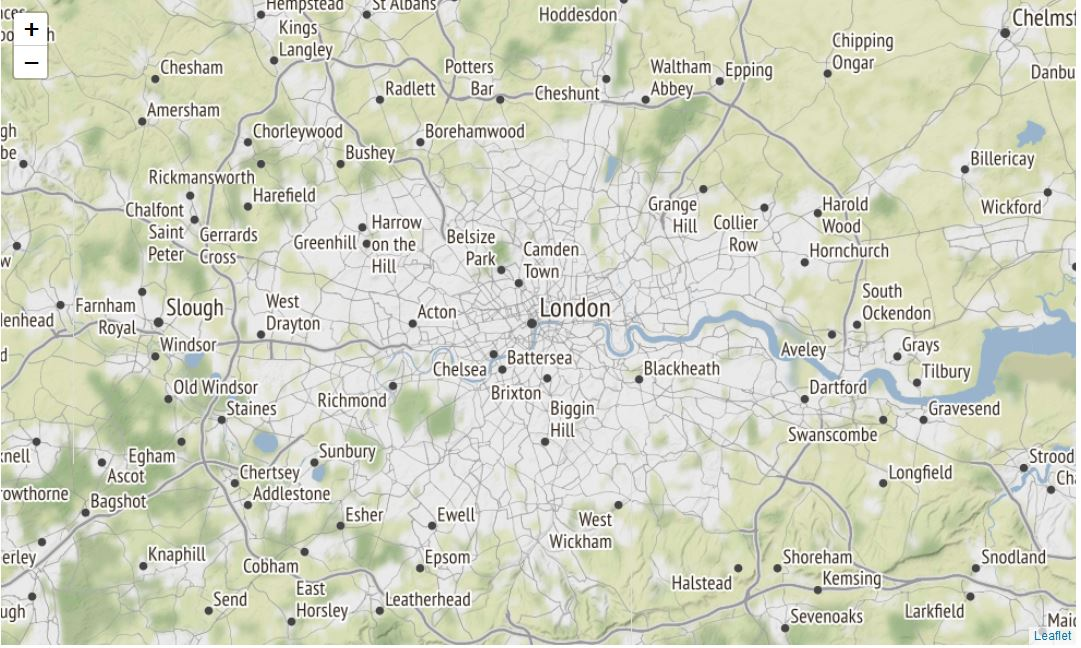

### 2. Importing and cleaning the dataset 

In [4]:
pubs = pd.read_csv('https://data.london.gov.uk/download/cultural-infrastructure-map/7e6b0f36-da01-4029-99d7-640d89c4a0a4/Pubs.csv', encoding='ANSI')
pubs.head()

name            address1 address2    address3 borough_name  \
0       Harlequin    27 Arlington Way   London    Finsbury    Islington   
1         Peasant  240 St John Street   London    Finsbury    Islington   
2   Blues Kitchen    134 Curtain Road   London  Shoreditch      Hackney   
3  Caraway Lounge    290 North Street  Romford         NaN     Havering   
4             Rye      31 Peckham Rye  Peckham      London    Southwark   

   website  os_addressbase_uprn borough_code            ward_2018_name  \
0      NaN                  NaN    E09000019               Clerkenwell   
1      NaN                  NaN    E09000019               Clerkenwell   
2      NaN                  NaN    E09000012  Hoxton East & Shoreditch   
3      NaN                  NaN    E09000016                Brooklands   
4      NaN                  NaN    E09000028                  Rye Lane   

  ward_2018_code  longitude   latitude        easting       northing  \
0      E05000370  -0.106107  51.530110  531466.964381  182943.923225   
1      E05000370  -0.103263  51.526026  531675.964323  182494.923348   
2      E05009377  -0.079972  51.526565  533289.963883  182596.923318   
3      E05000306   0.172747  51.585187  550625.959172  189605.921414   
4      E05011113  -0.065397  51.464652  534482.963558  175738.925180   

      runtime  
0  06/21/2020  
1  06/21/2020  
2  06/21/2020  
3  06/21/2020  
4  06/21/2020

In [5]:
# Dropping the unnecessary variables/ features from the dataset

pubs = pubs.drop(columns=['address2', 'address3', 'website', 'os_addressbase_uprn','borough_code', 'ward_2018_code', 'easting', 'northing', 'runtime'])
pubs.head()

name            address1 borough_name            ward_2018_name  \
0       Harlequin    27 Arlington Way    Islington               Clerkenwell   
1         Peasant  240 St John Street    Islington               Clerkenwell   
2   Blues Kitchen    134 Curtain Road      Hackney  Hoxton East & Shoreditch   
3  Caraway Lounge    290 North Street     Havering                Brooklands   
4             Rye      31 Peckham Rye    Southwark                  Rye Lane   

   longitude   latitude  
0  -0.106107  51.530110  
1  -0.103263  51.526026  
2  -0.079972  51.526565  
3   0.172747  51.585187  
4  -0.065397  51.464652

In [6]:
pubs.shape

(4098, 6)

In [7]:
pubs.dropna()

name                           address1  \
0             Harlequin                   27 Arlington Way   
1               Peasant                 240 St John Street   
2         Blues Kitchen                   134 Curtain Road   
3        Caraway Lounge                   290 North Street   
4                   Rye                     31 Peckham Rye   
...                 ...                                ...   
4093             Salsa!  Temple Place, Victoria Embankment   
4094      Edgar Wallace                    40 Essex Street   
4095  Temple Brew House                        46 Essex St   
4096    Cheshire Cheese              5 Little Essex Street   
4097            Simmons                     1 Milford Lane   

             borough_name            ward_2018_name  longitude   latitude  
0               Islington               Clerkenwell  -0.106107  51.530110  
1               Islington               Clerkenwell  -0.103263  51.526026  
2                 Hackney  Hoxton East & Shoreditch  -0.079972  51.526565  
3                Havering                Brooklands   0.172747  51.585187  
4               Southwark                  Rye Lane  -0.065397  51.464652  
...                   ...                       ...        ...        ...  
4093  City of Westminster               St. James's  -0.113686  51.511033  
4094  City of Westminster               St. James's  -0.112861  51.512872  
4095  City of Westminster               St. James's  -0.112861  51.512872  
4096  City of Westminster               St. James's  -0.113084  51.512687  
4097  City of Westminster               St. James's  -0.113527  51.512793  

[4094 rows x 6 columns]

#### After droping the missing values a total number of 4094 pub still remained in the dataset. Names were modified.

In [8]:
# Rename Variables 
pubs = pubs.rename(columns={'address1':'Address',
                        'borough_name': 'Borough', 
                        'ward_2018_name': 'Ward'})
pubs.head()

name             Address    Borough                      Ward  \
0       Harlequin    27 Arlington Way  Islington               Clerkenwell   
1         Peasant  240 St John Street  Islington               Clerkenwell   
2   Blues Kitchen    134 Curtain Road    Hackney  Hoxton East & Shoreditch   
3  Caraway Lounge    290 North Street   Havering                Brooklands   
4             Rye      31 Peckham Rye  Southwark                  Rye Lane   

   longitude   latitude  
0  -0.106107  51.530110  
1  -0.103263  51.526026  
2  -0.079972  51.526565  
3   0.172747  51.585187  
4  -0.065397  51.464652

In [9]:
# instantiate a feature group for the Pubs in the dataframe
places = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(pubs.latitude, pubs.longitude):
    places.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
London_map.add_child(places)

The map you will obtain will look like this image below. 

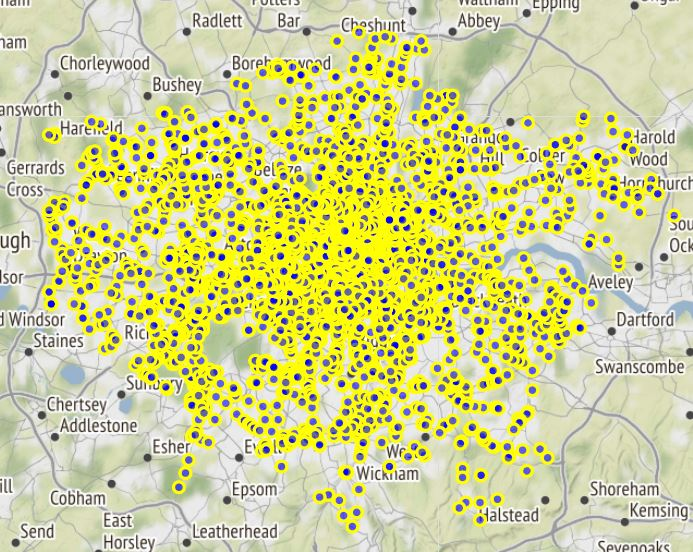

Following the representatation of each pub on the above map in the next map the pubs were clustered and grouped based on the smallest distance between them. this map reveals most pubs were concentrated in Camden, City of London and Westminster. When zooming we can observe the concentration of pubs at ward level.   

In [10]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
London_map = folium.Map(location = [London_latitude, London_longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
places = plugins.MarkerCluster().add_to(London_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(pubs.latitude, pubs.longitude, pubs.Borough):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(places)

# display map
London_map

the map you will obtain will look like this 

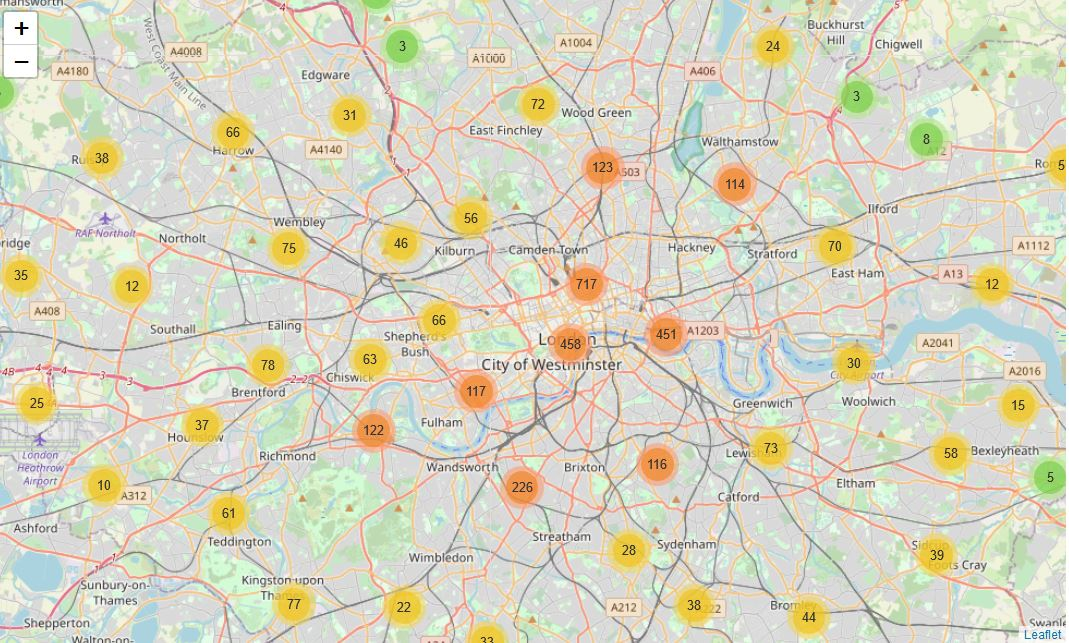

In [11]:
Borough = pubs.groupby(['Borough'])['name'].count()
Borough.columns = ['Borough','number of Pubs']
Borough

Borough
Barking and Dagenham                      29
Barnet                                    77
Bexley                                    85
Brent                                    109
Bromley                                  108
Camden                                   270
City and County of the City of London    215
City of Westminster                      457
Croydon                                  110
Ealing                                   105
Enfield                                   72
Greenwich                                100
Hackney                                  178
Hammersmith and Fulham                   129
Haringey                                  86
Harrow                                    64
Havering                                  71
Hillingdon                               108
Hounslow                                  93
Islington                                243
Kensington and Chelsea                    99
Kingston upon Thames                      74
La

#### Conclusion 

Grouping the number of pubs by borough it can be observed some boroughs have a high concentration of pubs: **Westminster - 457**, **Camden - 270**, **Islington - 243**, **City of London - 215**. 

So, if some intends to keep social distancing while enjoying a pint of lager, they would rather search more local pubs where the human density might allow more social distancing. 

* If you read this Notebook please email me any comments or suggestions to my email sebastian@bianalytics.org

